In [34]:
import metpy.calc as mpcalc
from metpy.units import units
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [50]:
def log_interpolation(x, xp, fp, **kwargs):
    """
    
    """
    print(fp)
    sort_args = np.argsort(xp)
    interpolated_vals =  np.interp(np.log(x.m), np.log(xp.m[sort_args]), fp[sort_args], **kwargs)
    return interpolated_vals * fp.units

def linear_interpolation(x, xp, fp, **kwargs):
    sort_args = np.argsort(xp)
    interpolated_vals =  np.interp(x, xp[sort_args], fp[sort_args], **kwargs)
    return interpolated_vals

In [51]:
heights = np.linspace(20000, 0, 10) * units.meters

In [52]:
T = (25 - 10 * (heights.m/1000)) * units.degC

In [53]:
p = mpcalc.height_to_pressure_std(heights)

In [54]:
pi = np.arange(1000, 100, -20) * units.hPa
Tlin = linear_interpolation(pi, p, T)
Tlog = log_interpolation(pi, p, T)
hi = mpcalc.pressure_to_height_std(pi).to('m')

[-175.         -152.77777778 -130.55555556 -108.33333333  -86.11111111  -63.88888889  -41.66666667  -19.44444444    2.77777778   25.        ] degC


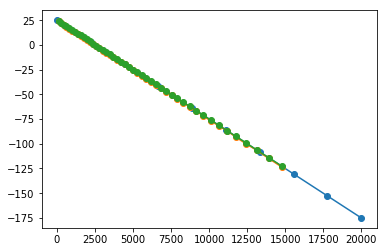

In [55]:
plt.plot(heights, T, marker='o')
plt.plot(hi, Tlin, marker='o')
plt.plot(hi, Tlog, marker='o')

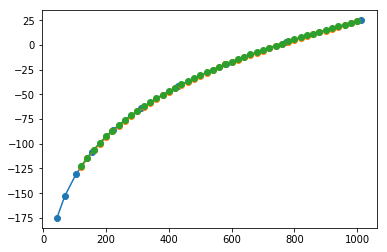

In [56]:
plt.plot(p, T, marker='o')
plt.plot(pi, Tlin, marker='o')
plt.plot(pi, Tlog, marker='o')

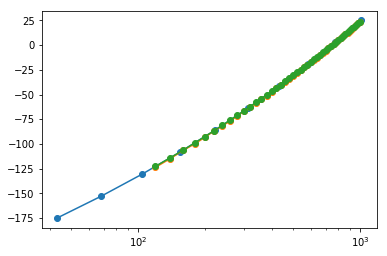

In [57]:
plt.semilogx(p, T, marker='o')
plt.semilogx(pi, Tlin, marker='o')
plt.semilogx(pi, Tlog, marker='o')

In [58]:
plt.plot(Tlin-Tlog)

DimensionalityError: Cannot convert from 'degC' to 'dimensionless'

In [60]:
Tlog

<Quantity([  23.91839096   22.25832463   20.56402772   18.8340588    17.06688341
   15.2608659    13.41426035   11.52520041    9.59168793    7.61158034
    5.5825763     3.50219964    1.44035054   -0.63820893   -2.77372227
   -4.96939875   -7.22872683   -9.5555074   -11.95389236  -14.42842911
  -16.98411253  -19.61656989  -22.20322547  -24.88396163  -27.66588122
  -30.55692315  -33.56599892  -36.70315833  -39.979792    -43.3089181
  -46.69899269  -50.26299163  -54.01973064  -57.99125419  -62.2036194
  -66.51755046  -71.01955696  -75.85534021  -81.07838402  -86.71434395
  -92.53050339  -98.95996935 -106.14750079 -113.88273441 -122.63749477], 'degC')>

In [61]:
np.arange(900, 700, -100)

array([900, 800])

In [62]:
np.arange(1000, 10, -100)

array([1000,  900,  800,  700,  600,  500,  400,  300,  200,  100])